#### Packages

In [181]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from sklearn.manifold import TSNE
import plotly.express as px

# Taxonomies

#### Characteristics of a good taxonomy

* Standardized across comparison groups
* Hierarchically flexible: Aligns with diverse business needs
* Easy to map to
* Evolves with a changing occupational landscape

## Example with O*Net

#### Data

In [6]:
onet_act = pd.read_csv('https://www.onetcenter.org/dl_files/database/db_24_3_text/Work%20Activities.txt',sep='\t')

In [9]:
onet_occ_names = pd.read_csv('https://www.onetcenter.org/dl_files/database/db_28_2_text/Occupation%20Data.txt',sep='\t')

In [7]:
onet_act

,O*NET-SOC Code,Element ID,Element Name,Scale ID,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,4.A.1.a.1,Getting Information,IM,4.72,35.0,0.13,4.46,4.98,N,NaN,07/2014,Incumbent
1,11-1011.00,4.A.1.a.1,Getting Information,LV,5.35,35.0,0.23,4.89,5.81,N,N,07/2014,Incumbent
2,11-1011.00,4.A.1.a.2,"Monitor Processes, Materials, or Surroundings",IM,3.68,35.0,0.17,3.33,4.03,N,NaN,07/2014,Incumbent
3,11-1011.00,4.A.1.a.2,"Monitor Processes, Materials, or Surroundings",LV,4.76,34.0,0.27,4.22,5.30,N,N,07/2014,Incumbent
4,11-1011.00,4.A.1.b.1,"Identifying Objects, Actions, and Events",IM,4.20,35.0,0.15,3.91,4.50,N,NaN,07/2014,Incumbent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79371,53-7121.00,4.A.4.c.1,Performing Administrative Activities,LV,2.27,27.0,0.32,1.61,2.92,N,N,08/2019,Incumbent
79372,53-7121.00,4.A.4.c.2,Staffing Organizational Units,IM,1.93,27.0,0.21,1.50,2.37,N,NaN,08/2019,Incumbent
79373,53-7121.00,4.A.4.c.2,Staffing Organizational Units,LV,1.60,27.0,0.30,0.99,2.21,N,N,08/2019,Incumbent
79374,53-7121.00,4.A.4.c.3,Monitoring and Controlling Resources,IM,2.56,27.0,0.26,2.03,3.09,N,NaN,08/2019,Incumbent


In [10]:
onet_occ_names

,O*NET-SOC Code,Title,Description
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh..."
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ..."
3,11-1031.00,Legislators,"Develop, introduce, or enact laws and statutes..."
4,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici..."
...,...,...,...
1011,55-3014.00,Artillery and Missile Crew Members,"Target, fire, and maintain weapons used to des..."
1012,55-3015.00,Command and Control Center Specialists,"Operate and monitor communications, detection,..."
1013,55-3016.00,Infantry,Operate weapons and equipment in ground combat...
1014,55-3018.00,Special Forces,"Implement unconventional operations by air, la..."


#### Representation

In [13]:
onet_rep = onet_act.merge(onet_occ_names,on='O*NET-SOC Code',how='left').pivot_table(
    index='Title',columns='Element Name',values='Data Value',aggfunc='mean')

In [14]:
onet_rep 

Element Name,Analyzing Data or Information,Assisting and Caring for Others,Coaching and Developing Others,Communicating with Persons Outside Organization,"Communicating with Supervisors, Peers, or Subordinates",Controlling Machines and Processes,Coordinating the Work and Activities of Others,Developing Objectives and Strategies,Developing and Building Teams,Documenting/Recording Information,...,Provide Consultation and Advice to Others,Repairing and Maintaining Electronic Equipment,Repairing and Maintaining Mechanical Equipment,Resolving Conflicts and Negotiating with Others,Scheduling Work and Activities,Selling or Influencing Others,Staffing Organizational Units,Thinking Creatively,Training and Teaching Others,Updating and Using Relevant Knowledge
Title,,,,,,,,,,,,,,,,,,,,,
Actors,1.580,2.140,2.385,3.625,4.410,1.115,2.275,1.655,2.235,2.215,...,1.720,0.850,0.865,2.130,2.275,1.720,1.005,4.525,2.490,2.050
Actuaries,5.690,1.425,3.875,4.090,4.700,0.645,3.630,3.905,3.655,3.835,...,4.590,0.590,0.500,3.060,3.390,2.890,3.080,4.330,3.475,4.940
Acute Care Nurses,3.925,5.630,4.265,3.055,4.770,3.480,4.090,3.350,4.350,4.910,...,3.285,1.535,1.225,4.425,3.800,2.445,3.325,3.500,4.075,4.630
Adapted Physical Education Specialists,3.905,4.500,4.530,4.035,4.545,1.965,3.640,4.660,3.595,3.755,...,4.500,1.160,1.725,3.830,3.705,2.560,1.750,4.795,4.580,4.605
Adhesive Bonding Machine Operators and Tenders,2.430,2.375,2.595,0.850,3.600,4.760,3.090,2.145,3.395,2.895,...,1.695,2.390,3.315,1.595,2.400,1.385,1.255,2.200,3.225,2.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wind Energy Operations Managers,4.160,2.750,3.835,3.965,4.610,3.725,4.575,3.830,3.980,3.935,...,3.845,3.490,3.775,4.220,4.390,2.465,3.450,4.020,3.525,4.235
Wind Turbine Service Technicians,3.175,2.955,3.185,2.620,3.980,4.645,3.355,2.895,2.950,3.495,...,2.820,4.805,5.055,2.365,3.280,1.795,1.640,3.485,3.465,4.290
"Woodworking Machine Setters, Operators, and Tenders, Except Sawing",2.215,1.750,1.830,1.070,3.075,4.405,2.465,1.715,2.010,2.325,...,1.655,1.900,2.620,1.535,1.685,1.045,0.860,2.555,2.145,2.700


In [186]:
x = 'Economists'
top_n = 20
onet_rep.loc[x,:].sort_values(ascending=False).iloc[:top_n]

Element Name
Analyzing Data or Information                                                      5.605
Processing Information                                                             5.415
Getting Information                                                                5.325
Updating and Using Relevant Knowledge                                              4.935
Thinking Creatively                                                                4.890
Making Decisions and Solving Problems                                              4.890
Interacting With Computers                                                         4.715
Interpreting the Meaning of Information for Others                                 4.700
Training and Teaching Others                                                       4.565
Communicating with Supervisors, Peers, or Subordinates                             4.500
Identifying Objects, Actions, and Events                                           4.500
Communic

#### Similar jobs

In [187]:
x = 'Economists'
top_n = 20
pd.DataFrame(distance.cdist(onet_rep.loc[[x],:],onet_rep),index=[x],columns=onet_rep.index).loc[x,:].sort_values()[1:top_n+1]

Title
Environmental Economists                       1.499933
Mathematicians                                 2.444709
Political Scientists                           2.639114
Statisticians                                  2.644059
Sociologists                                   2.846893
Geographers                                    3.136666
Financial Quantitative Analysts                3.196479
Operations Research Analysts                   3.226387
Biostatisticians                               3.326759
Library Science Teachers, Postsecondary        3.341119
Actuaries                                      3.371947
Political Science Teachers, Postsecondary      3.450424
Industrial Ecologists                          3.669118
Epidemiologists                                3.715037
Survey Researchers                             3.748016
Sociology Teachers, Postsecondary              3.900554
Remote Sensing Scientists and Technologists    3.970922
Atmospheric and Space Scientists          

#### T-SNE plot

In [51]:
%%time
tsne_onet = pd.DataFrame(TSNE().fit_transform(
    onet_rep),index=onet_rep.index).reset_index()

CPU times: user 10.1 s, sys: 4.71 s, total: 14.8 s
Wall time: 2.11 s


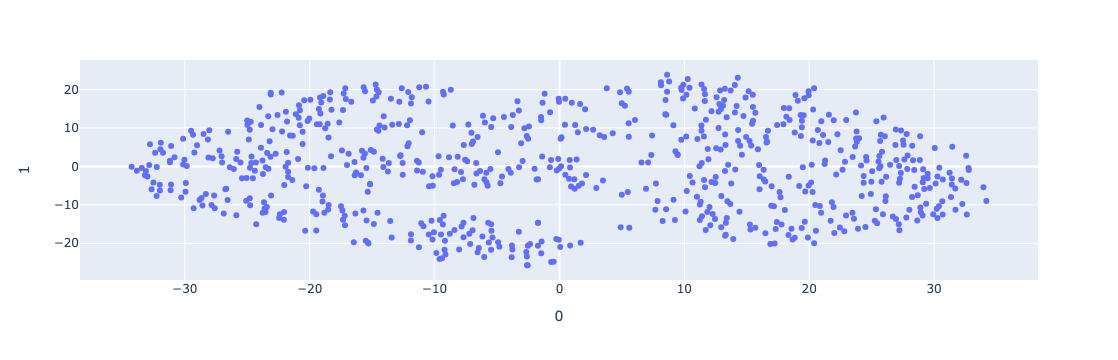

In [53]:
px.scatter(tsne_onet.dropna(),x=0,y=1,
           hover_data=['Title'])

## Jobs

#### Data

In [32]:
job_rep = pd.read_parquet('/Users/reveliolabs/Documents/Data/ben_pres/job_embedding/job_embeddings.parquet').set_index('mapped_role')

In [36]:
title_mapping = pd.read_parquet('/Users/reveliolabs/Documents/Data/ben_pres/job_embedding/title_to_mapped_role.parquet').set_index('title')

In [40]:
job_taxo = pd.read_parquet('/Users/reveliolabs/Documents/Data/ben_pres/job_embedding/job_taxonomy.parquet').set_index('mapped_role')

#### Similar Jobs

In [90]:
x = 'talent leader'
top_n = 20
pd.DataFrame(distance.cdist(job_rep.loc[[title_mapping.loc[x,'mapped_role']],:],
             job_rep),index=[x],columns=job_rep.index).loc[x,:].sort_values()[1:top_n+1]

mapped_role
talent development               4.569101
people                           4.776413
talent acquisition               5.764690
human resources consultant       5.867623
recruitment                      6.182182
hr operations                    6.207858
search                           6.357880
training development             6.481144
recruiting                       6.511069
hr business                      6.559689
hr consultant                    6.565478
human resources business         6.592538
leadership development           6.644574
talent acquisition consultant    6.693446
recruiter                        6.719328
relations                        6.741802
hr                               6.785273
recruitment coordinator          6.823470
hr project                       6.851217
engagement                       6.855165
Name: talent leader, dtype: float64

#### T-SNE plot

In [71]:
%%time
tsne_jobs = pd.DataFrame(TSNE().fit_transform(
    job_rep),index=job_rep.index).reset_index()

CPU times: user 13.1 s, sys: 6.64 s, total: 19.7 s
Wall time: 3.08 s


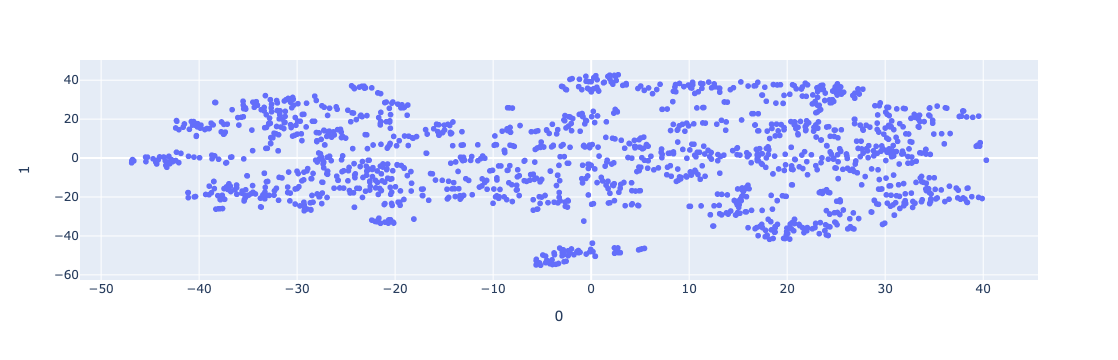

In [95]:
px.scatter(tsne_jobs.dropna(),x=0,y=1,
           hover_data=['mapped_role'])

#### Hierarchical Jobs Taxonomy

In [92]:
x = 'people analytics'
job_taxo.loc[title_mapping.loc[x,'mapped_role'],[ 'role_k1000', 
       'role_k500', 'role_k250', 'role_k150', 'role_k100',
       'role_k75', 'role_k50']]

role_k1000          Data Analytics
role_k500     Analytics Specialist
role_k250     Analytics Specialist
role_k150           Data Scientist
role_k100         Business Analyst
role_k75              Data Analyst
role_k50              Data Analyst
Name: data analytics, dtype: object

## Skills

#### Data

In [77]:
skills_rep = pd.read_parquet('/Users/reveliolabs/Documents/Data/ben_pres/skill/skill_embeddings.parquet').set_index('skill')

In [80]:
skill_mapping = pd.read_parquet('/Users/reveliolabs/Documents/Data/ben_pres/skill/raw_skill_to_skill.parquet').set_index('raw_skill')

In [82]:
skill_taxo = pd.read_parquet('/Users/reveliolabs/Documents/Data/ben_pres/skill/skill_taxonomy.parquet').set_index('skill')

In [194]:
skills_rep2 = skills_rep.join(skill_taxo['skill_mapped']).groupby('skill_mapped').mean()

#### Similar Skills

In [196]:
x = 'talent intelligence'
top_n = 20
pd.DataFrame(distance.cdist(skills_rep2.loc[[skill_taxo.loc[skill_mapping.loc[s,'skill'],'skill_mapped']],:],
             skills_rep2),index=[x],columns=skills_rep2.index).loc[x,:].sort_values()[1:top_n+1]

skill_mapped
talent acquisition         3.866509
technical recruiting       3.947354
recruiting                 4.031374
succession planning        5.070172
onboarding                 5.140233
personnel management       5.160878
it recruitment             5.203342
organizational design      5.269506
strategic hr               5.285503
interviewing               5.461831
job coaching               5.463334
performance management     5.469224
sourcing                   5.529909
workforce planning         5.568975
recruitment advertising    5.633327
hr consulting              5.646431
employee engagement        5.659853
college recruiting         5.708134
employer branding          5.719369
human resources            5.807778
Name: talent intelligence, dtype: float64

#### T-SNE plot

In [93]:
%%time
tsne_skills = pd.DataFrame(TSNE().fit_transform(
    skills_rep),index=skills_rep.index).reset_index()

CPU times: user 1min 42s, sys: 25.5 s, total: 2min 7s
Wall time: 18.8 s


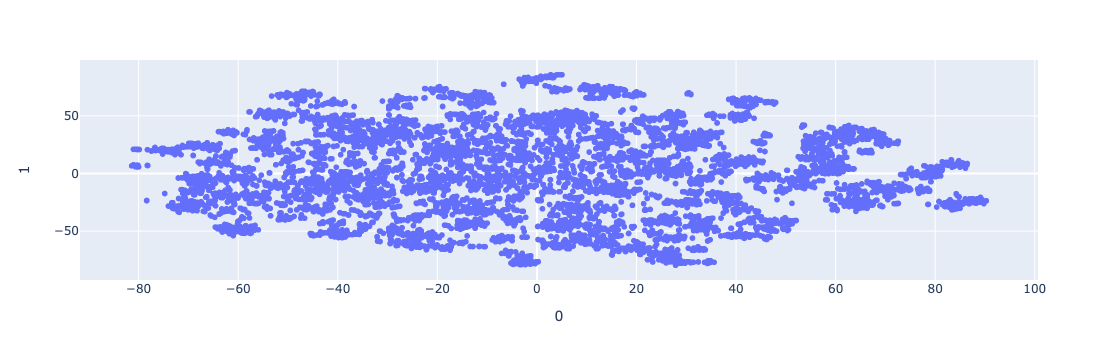

In [200]:
px.scatter(tsne_skills.dropna(),x=0,y=1,
           hover_data=['skill'])

#### Hierarchical Skill Taxonomy

In [103]:
x = 'talent intelligence'
skill_taxo.loc[skill_mapping.loc[x,'skill'],['skill_mapped', 'skill_k2500', 'skill_k2000',
       'skill_k1500', 'skill_k1000',  'skill_k500', 'skill_k400',
       'skill_k300',  'skill_k200',
       'skill_k100', 'skill_k75', 'skill_k50']]

skill_mapped                                    talent management
skill_k2500                                     talent management
skill_k2000                talent management / talent acquisition
skill_k1500     recruiting / talent management / talent acquis...
skill_k1000     recruiting / talent management / talent acquis...
skill_k500              recruiting / talent management / sourcing
skill_k400              recruiting / talent management / sourcing
skill_k300            recruiting / talent management / interviews
skill_k200            recruiting / talent management / interviews
skill_k100            recruiting / talent management / interviews
skill_k75             recruiting / talent management / interviews
skill_k50                      management / leadership / training
Name: talent pipelining, dtype: object

## Job-skill relationship

#### Data

In [104]:
crosswalk_jobs_skills = pd.read_parquet('/Users/reveliolabs/Documents/Data/skill_mapped_role_counts.parquet')

In [105]:
crosswalk_jobs_skills

,skill,mapped_role,cnt
0,video editing,graphic designer,146608
1,sports management,communication,12503
2,banking,collections,15527
3,mcse 2003,infrastructure,449
4,content strategy,journalist,79628
...,...,...,...
2627663,non-profit volunteering,claims representative,109
2627664,technology needs analysis,student worker,117
2627665,ni labview,photographer,105
2627666,multilingual,qa,115


#### Top Roles for a Skill

In [130]:
s = 'talent intelligence'
level = 'role_k500'
top_n = 20
t = crosswalk_jobs_skills.loc[crosswalk_jobs_skills['skill']==skill_mapping.loc[s,'skill'],:].merge(
    job_taxo[[level]],left_on='mapped_role',right_index=True).groupby(level,as_index=False)['cnt'].sum()
t['share'] = t['cnt']/t['cnt'].sum()
t.sort_values('cnt',ascending=False).iloc[:top_n].set_index(level)

,cnt,share
role_k500,,
Recruiter,9362,0.357110
Recruitment Specialist,5254,0.200412
HR Business Partner,3407,0.129959
Human Resources Specialist,1730,0.065990
HR Specialist,1614,0.061565
Talent Specialist,1243,0.047414
Consulting,440,0.016784
Learning and Development Consultant,367,0.013999
Teacher,343,0.013084


#### Top Skills for a Role

In [133]:
j = 'software engineer'
level = 'skill_k100'
top_n = 20
t = crosswalk_jobs_skills.loc[crosswalk_jobs_skills['mapped_role']==title_mapping.loc[j,'mapped_role'],:].merge(
    skill_taxo[[level]],left_on='skill',right_index=True).groupby(level,as_index=False)['cnt'].sum()
t['share'] = t['cnt']/t['cnt'].sum()
t.sort_values('cnt',ascending=False).iloc[:top_n].set_index(level)

,cnt,share
skill_k100,,
software development / agile methodologies / xml,11088884,0.130185
html / javascript / mysql,10884288,0.127783
c++ / c / matlab,7520452,0.088291
java enterprise edition / java server pages / hibernate,6441130,0.075620
c# / .net / asp.net,5866266,0.068871
java / eclipse / android,5040660,0.059178
linux / unix / perl,4293509,0.050406
git / node.js / mongodb,4063547,0.047706
business analysis / integration / business process improvement,3364814,0.039503


## Activities

#### Data

In [137]:
# activity_rep =  pd.read_parquet('/Users/reveliolabs/Documents/Data/ben_activities/activity_embeddings.parquet')

In [143]:
activity_taxo = pd.read_parquet('/Users/reveliolabs/Documents/Data/ben_activities/activity_taxonomy.parquet').set_index('k1665_index')

In [139]:
crosswalk_jobs_activities = pd.read_parquet('/Users/reveliolabs/Documents/Data/ben_activities/act_to_mapped_role_frequency.parquet')

In [140]:
crosswalk_skills_activities = pd.read_parquet('/Users/reveliolabs/Documents/Data/ben_activities/act_to_skill_frequency.parquet')

#### Top Activities for a job

In [160]:
j = 'hrbp'
level = 'act_k100'
top_n = 10
t = crosswalk_jobs_activities.loc[crosswalk_jobs_activities['mapped_role']==title_mapping.loc[j,'mapped_role'],:].merge(
    activity_taxo[[level]],left_on='k1665_index',right_index=True).groupby(level,as_index=False)['count'].sum()
t['share'] = t['count']/t['count'].sum()
t.sort_values('count',ascending=False).iloc[:top_n].set_index(level)

,count,share
act_k100,,
"Oversee employee recruitment, training, and performance",19999,0.116379
Enhance client relations and business growth,13418,0.078083
Analyze financial data for compliance insights,11844,0.068923
Coordinate program managment,7407,0.043103
Lead retail team development and customer engagement,6225,0.036225
Lead workforce development and team leadership initiatives,5185,0.030173
Manage staff training and performance evaluations,4802,0.027944
"Optimize retail sales, merchandising, and customer service",4643,0.027019
Service customers in retail,4614,0.026850


#### Top activities for a skill

In [180]:
s = 'talent intelligence'
level = 'act_k100'
top_n = 10
t = crosswalk_skills_activities.loc[crosswalk_skills_activities['skill_mapped']==
                            skill_taxo.loc[skill_mapping.loc[s,'skill'],'skill_mapped'],:].merge(
    activity_taxo[[level]],left_on='k1665_index',right_index=True).groupby(level,as_index=False)['count'].sum()
t['share'] = t['count']/t['count'].sum()
t.sort_values('count',ascending=False).iloc[:top_n].set_index(level)

,count,share
act_k100,,
Enhance client relations and business growth,145407,0.139477
"Oversee employee recruitment, training, and performance",69547,0.066711
Analyze financial data for compliance insights,65766,0.063084
"Optimize retail sales, merchandising, and customer service",49524,0.047504
Lead retail team development and customer engagement,40010,0.038378
Coordinate program managment,37927,0.036380
Service customers in retail,36373,0.034890
Enhance sales and customer relationship management,33484,0.032118
Lead technology solution development and integration,33224,0.031869


# Resources

https://www.data-dictionary.reveliolabs.com/methodology.html#jobs-taxonomy

https://www.data-dictionary.reveliolabs.com/methodology.html#skill-clustering